<a href="https://colab.research.google.com/github/AshutoshLembhe/Machine-Learning-with-Python-Basics/blob/master/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
!pip install mglearn

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=1a9d4286cc021af3c5f2c9a4f5b379ce659d8d62501762333e6a6906b448690e
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X,y=make_moons(n_samples=100, noise=0.25,random_state=3)
X_train, X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

forest = RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

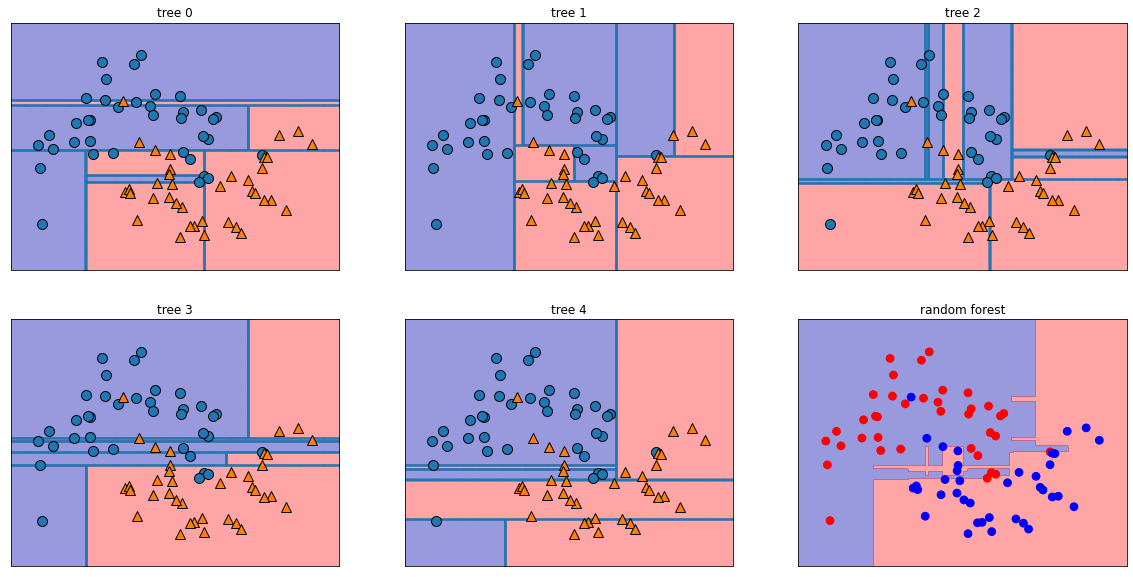

In [5]:
import mglearn
fig, axes = plt.subplots(2, 3, figsize=(20, 10)) 
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):   
   ax.set_title("tree %d" % i)   
   mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax) 
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4) 
axes[-1, -1].set_title("random forest") 
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.array(['r', 'b'])[y_train], s=60)


In [11]:
#trying random forest on breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,stratify=cancer.target, random_state=0) 
forest = RandomForestClassifier(n_estimators=100, random_state=0) 
forest.fit(X_train, y_train)
print("accuracy on training set: %f" % forest.score(X_train, y_train)) 
print("accuracy on test set: %f" % forest.score(X_test, y_test))



accuracy on training set: 0.997653
accuracy on test set: 0.944056


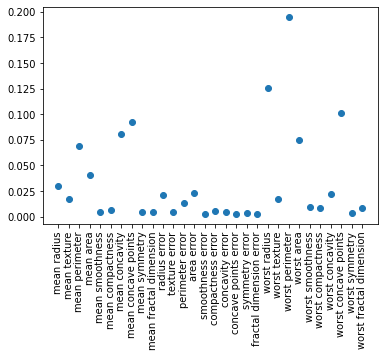

In [12]:
plt.plot(forest.feature_importances_, 'o') 
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90);

In [ ]:
#Random forests are very powerful and are used widely for machine learning model 
#They do the job without heavy tuning of of parameters and dont require scaling.